# Instalaçoes e bibliotecas necessárias

In [2]:
!pip install unidecode openpyxl imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 5.4 MB/s eta 0:00:00


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
import pandas as pd
import re
import string
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import drive
from collections import Counter

# Carregando dataset

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
dfds = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/MiniProjeto/dataset/CorpusTwitchVideojuegos.xlsx")
dfds = dfds[['TEXTO', 'Emociones']].dropna()
dfext = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/MiniProjeto/dataset/CorpusTwitchVideogames_Extension2024.xlsx")
dfext = dfext[['TEXTO', 'Emociones']].dropna()

# Função de pré-processamento

In [7]:
stop_words = set(stopwords.words('spanish'))
stemmer = SnowballStemmer('spanish')
tokenizer = TweetTokenizer()

In [8]:
def preprocess(text):
    text = str(text).lower()
    text = unidecode(text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = re.sub(r'\b(j[aeiou]{1,})+\b', 'jaja', text)
    text = re.sub(r'\bx[o0]+\b', 'pero', text)
    text = re.sub(r'\bxfa\b', 'por favor', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'\b(streamlabs|nightbot)\b', '', text)
    text = re.sub(r'\w*\d\w*', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))

    tokens = tokenizer.tokenize(text)
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# Aplica o pré-processamento

In [9]:
dfds['clean_text'] = dfds['TEXTO'].apply(preprocess)
dfext['clean_text'] = dfext['TEXTO'].apply(preprocess)

# Vetorização com TF-IDF e preparação de dados


In [10]:
y1 = dfds['Emociones']
y2 = dfext['Emociones']

In [11]:
vectorizer1 = TfidfVectorizer()
vectorizer2 = TfidfVectorizer()
X1 = vectorizer1.fit_transform(dfds['clean_text'])
X2 = vectorizer2.fit_transform(dfext['clean_text'])

In [12]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

In [13]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3, random_state=42)

**analisando distribuição**

In [14]:
print("Distribuição:", Counter(y1_train))

Distribuição: Counter({'Aprobación/Empatía/Confianza': 490, 'Desaprobación': 345, 'Indeterminado': 205, 'Decepción/Tristeza': 196, 'Interés/Anticipación/Hype': 185, 'Enfado/Ira': 129})


In [15]:
print("Distribuição:", Counter(y2_train))

Distribuição: Counter({'Aprobación/Empatía/Confianza': 869, 'Desaprobación': 675, 'Enfado/Ira': 537, 'Indeterminado': 469, 'Interés/Anticipación/Hype': 342, 'Decepción/Tristeza': 328})


#**Definindo modelos**

# Modelo treinados

In [16]:
rfds_model = RandomForestClassifier(
    n_estimators=100,
    max_features='log2',
    random_state=42
)
rfds_model.fit(X1_train, y1_train)

#parametros artigo: n_estimators: 500, max_features: sqrt
#meu parametro:  n_estimators: 100, max_features: log2

RandomForestClassifier(max_features='log2', random_state=42)

In [17]:
rfext_model = RandomForestClassifier(
    n_estimators=100,
    max_features='log2',
    random_state=42
)
rfext_model.fit(X2_train, y2_train)

#parametros artigo: n_estimators: 500, max_features: sqrt
#meu parametro:  n_estimators: 100, max_features: log2

RandomForestClassifier(max_features='log2', random_state=42)

In [18]:
svmds_model = SVC(C=1, kernel='linear', random_state=42)
svmds_model.fit(X1_train, y1_train)
#parametros Artigo: C=1000, kernel:'rbf'
#meu parametros: C=1, kernel:'linear'

SVC(C=1, kernel='linear', random_state=42)

In [19]:
svmext_model = SVC(C=1, kernel='linear', random_state=42)
svmext_model.fit(X2_train, y2_train)
#parametros Artigo: C=1000, kernel:'rbf'
#meu parametros: C=1, kernel:'linear'

SVC(C=1, kernel='linear', random_state=42)

# Realizando predições

In [20]:
rfds_pred = rfds_model.predict(X1_test)

In [21]:
svmds_pred = svmds_model.predict(X1_test)

In [22]:
rfext_pred = rfext_model.predict(X2_test)

In [23]:
svmext_pred = svmext_model.predict(X2_test)

# Resultados

**relatórios de classificação comparativo RANDOM FOREST**

In [24]:
print("\nCLASSIFICAÇÃO RANDOM FOREST dataset")
print(classification_report(y1_test, rfds_pred))

print("\nCLASSIFICAÇÃO RANDOM FOREST extensao")
print(classification_report(y2_test, rfext_pred))


CLASSIFICAÇÃO RANDOM FOREST dataset
                              precision    recall  f1-score   support

Aprobación/Empatía/Confianza       0.56      0.76      0.64       221
          Decepción/Tristeza       0.69      0.65      0.67        75
               Desaprobación       0.47      0.53      0.50       137
                  Enfado/Ira       0.41      0.31      0.35        39
               Indeterminado       0.53      0.25      0.34       110
   Interés/Anticipación/Hype       0.72      0.51      0.60        83

                    accuracy                           0.56       665
                   macro avg       0.56      0.50      0.52       665
                weighted avg       0.56      0.56      0.54       665


CLASSIFICAÇÃO RANDOM FOREST extensao
                              precision    recall  f1-score   support

Aprobación/Empatía/Confianza       0.46      0.72      0.56       376
          Decepción/Tristeza       0.71      0.45      0.55       143
           

**relatórios de classificação comparativo SVM**

In [25]:
print("\nCLASSIFICAÇÃO SVM DS")
print(classification_report(y1_test, svmds_pred))

print("\nCLASSIFICAÇÃO SVM EXT")
print(classification_report(y2_test, svmext_pred))


CLASSIFICAÇÃO SVM DS
                              precision    recall  f1-score   support

Aprobación/Empatía/Confianza       0.50      0.83      0.62       221
          Decepción/Tristeza       0.86      0.49      0.63        75
               Desaprobación       0.41      0.49      0.45       137
                  Enfado/Ira       0.53      0.26      0.34        39
               Indeterminado       0.68      0.17      0.28       110
   Interés/Anticipación/Hype       0.73      0.39      0.50        83

                    accuracy                           0.52       665
                   macro avg       0.62      0.44      0.47       665
                weighted avg       0.58      0.52      0.50       665


CLASSIFICAÇÃO SVM MEU EXT
                              precision    recall  f1-score   support

Aprobación/Empatía/Confianza       0.44      0.75      0.56       376
          Decepción/Tristeza       0.76      0.34      0.47       143
               Desaprobación       0.

***F1-score Random forest***

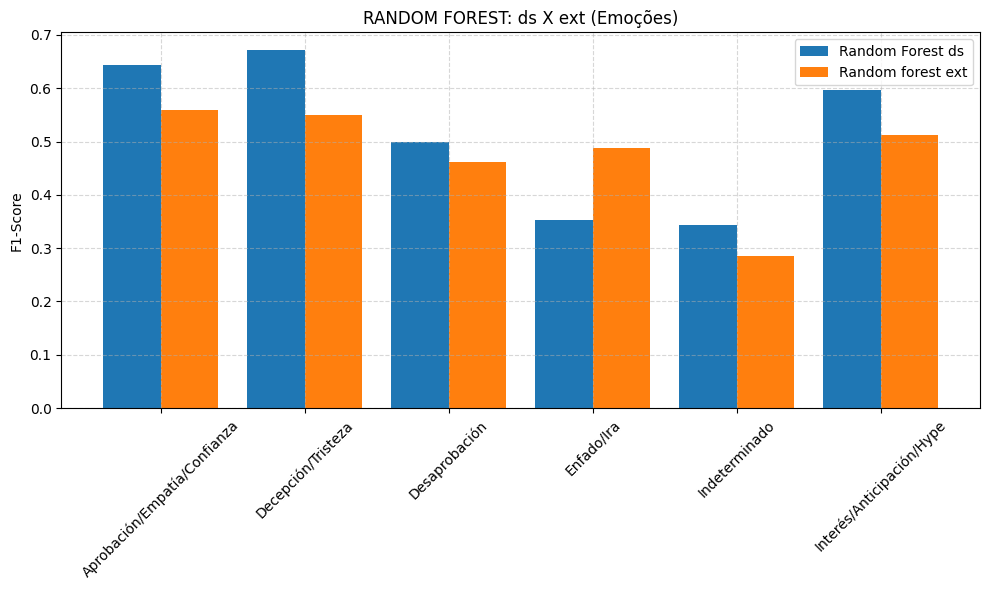

In [26]:
classes = sorted(list(set(y1.unique()) | set(y2.unique())))

f1_rfds = f1_score(y1_test, rfds_pred, average=None, labels=classes)
f1_rfext = f1_score(y2_test, rfext_pred, average=None, labels=classes)

x = range(len(classes))
plt.figure(figsize=(10, 6))
plt.bar(x, f1_rfds, width=0.4, label='Random Forest ds', align='center')
plt.bar([i + 0.4 for i in x], f1_rfext, width=0.4, label='Random forest ext', align='center')
plt.xticks([i + 0.2 for i in x], classes, rotation=45)
plt.ylabel('F1-Score')
plt.title('RANDOM FOREST: ds X ext (Emoções)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

***F1-score SVM***

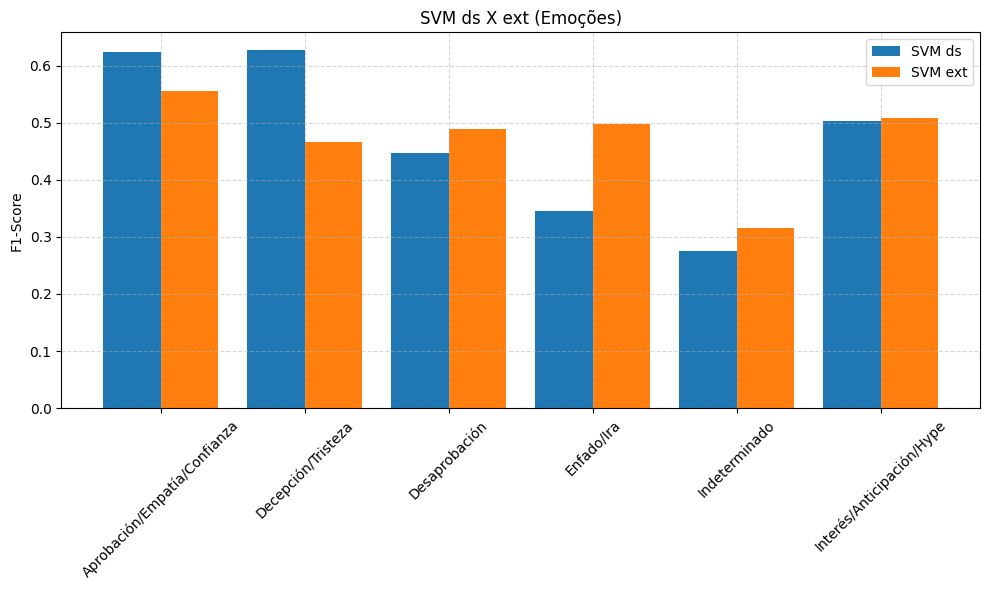

In [27]:
f1_svmds = f1_score(y1_test, svmds_pred, average=None, labels=classes)
f1_svmext = f1_score(y2_test, svmext_pred, average=None, labels=classes)

x = range(len(classes))
plt.figure(figsize=(10, 6))
plt.bar(x, f1_svmds, width=0.4, label='SVM ds', align='center')
plt.bar([i + 0.4 for i in x], f1_svmext, width=0.4, label='SVM ext', align='center')
plt.xticks([i + 0.2 for i in x], classes, rotation=45)
plt.ylabel('F1-Score')
plt.title('SVM ds X ext (Emoções)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

**Matriz de confusão random forest**

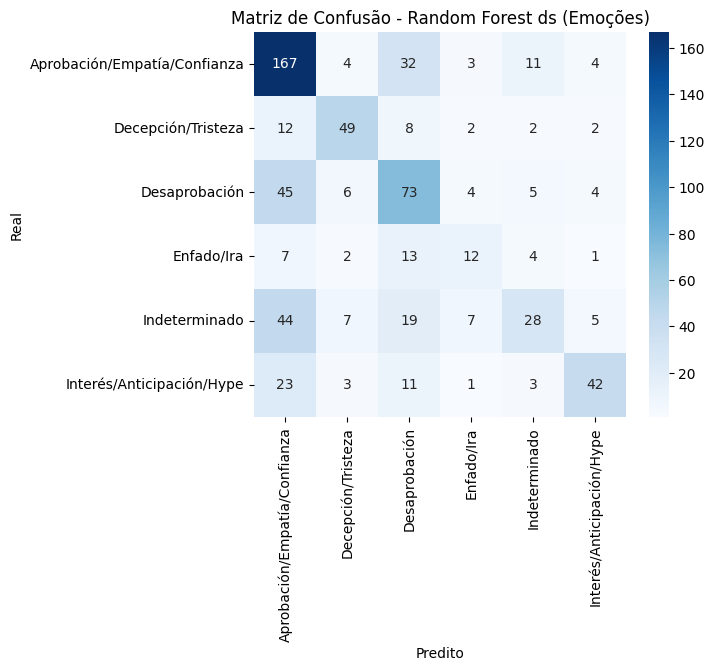

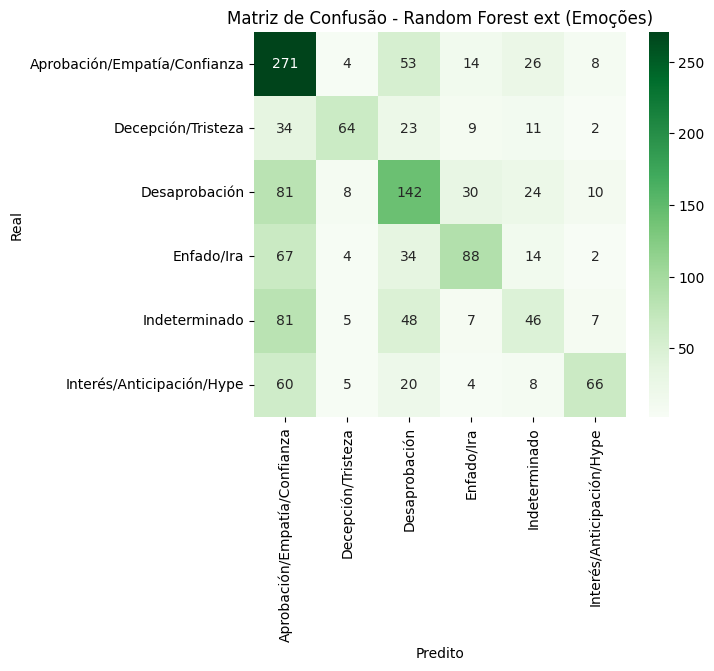

In [28]:
cm_rfds = confusion_matrix(y1_test, rfds_pred, labels=classes)
cm_rfext = confusion_matrix(y2_test, rfext_pred, labels=classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rfds, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão - Random Forest ds (Emoções)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm_rfext, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão - Random Forest ext (Emoções)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

**Matriz de confusão SVM**

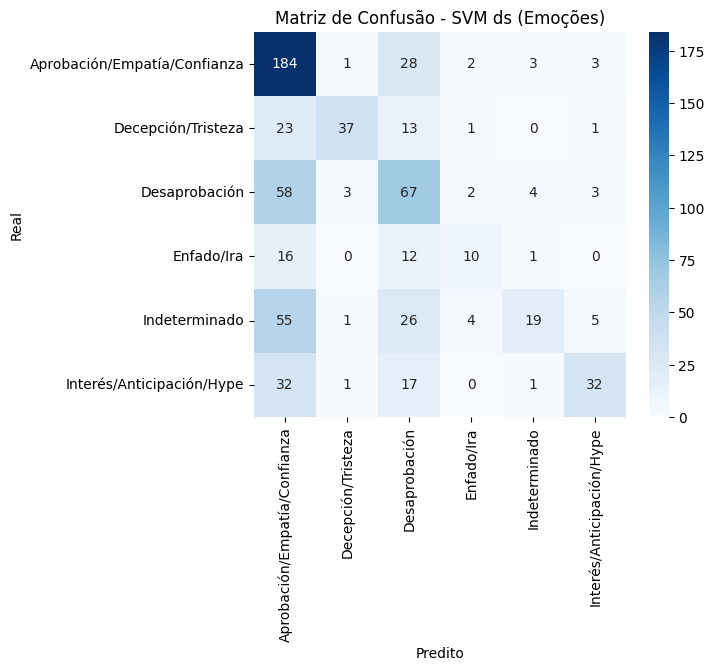

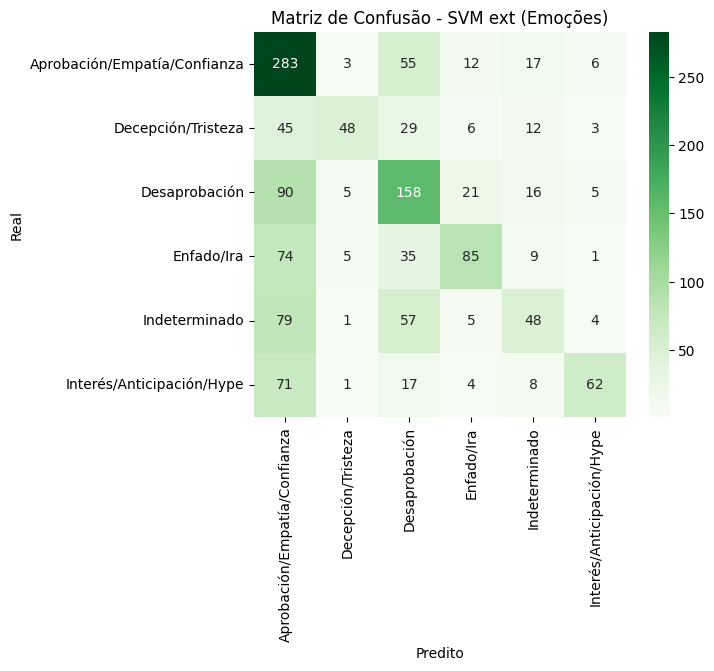

In [29]:
cm_svmds = confusion_matrix(y1_test, svmds_pred, labels=classes)
cm_svmext = confusion_matrix(y2_test, svmext_pred, labels=classes)

plt.figure(figsize=(6, 5))
sns.heatmap(cm_svmds, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão - SVM ds (Emoções)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()

plt.figure(figsize=(6, 5))
sns.heatmap(cm_svmext, annot=True, fmt='d', cmap='Greens', xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão - SVM ext (Emoções)')
plt.xlabel('Predito')
plt.ylabel('Real')
plt.show()